# Author: Ashwani Prasad
# Created on 23 July 2021

# 1 A simple program to caluclate the output power of TGC

In [1]:
# Code for exiting the program if required input of concentration is not provided.
import sys
from io import StringIO
from IPython import get_ipython


class IpyExit(SystemExit):
    """Exit Exception for IPython.

    Exception temporarily redirects stderr to buffer.
    """
    def __init__(self):
        # print("exiting")  # optionally print some message to stdout, too
        # ... or do other stuff before exit
        sys.stderr = StringIO()

    def __del__(self):
        sys.stderr.close()
        sys.stderr = sys.__stderr__  # restore from backup


def ipy_exit():
    raise IpyExit


if get_ipython():    # ...run with IPython
    exit = ipy_exit  # rebind to custom exit
else:
    exit = exit      # just make exit importable

In [1]:
#Exception Handling Classes
class Error(Exception):
    pass

class CellPotentialGreater(Error):
    pass

class CellPotentialNegative(Error):
    pass


#Program to calculate the power output of TGC
print("#######Output power calculation of TGC#######\n")

#### NOTE: The following values of Seebeck coefficient and concentrations of CuSO4 were taken from A. Gunawan, C.-H. Lin, D. A. Buttry, V. Mujica, R. A. Taylor, R. S. Prasher and P. E. Phelan, "Liquid Thermoelectrics: Review of Recent and Limited New Data of Thermogalvanic Cell Experiments," Nanoscale and Microscale Thermophysical Engineering, vol. 17, no. 4, pp. 304-323, 2013.

#Choose values of concentration from 0.01M, 0.05M, 0.314M, 0.7M and 1M only
conc = float(input("What is the concentration (mol/litre) of CuSO4 electrolyte used? : "))

#Seebeck Coefficient for given value of concentration.
if conc == 0.01:
    alpha = float(6.3e-4)
    print("The value of Seebeck Coefficient = " , alpha , " V/K")
elif conc == 0.05:
    alpha = float(8e-4)
    print("The value of Seebeck Coefficient = " , alpha , " V/K")
elif conc == 0.314:
    alpha = float(8.3e-4)
    print("The value of Seebeck Coefficient = " , alpha , " V/K")
elif conc == 0.7:
    alpha = float(8.4e-4)
    print("The value of Seebeck Coefficient = " , alpha , " V/K")
elif conc == 1.0:
    alpha = float(7.9e-4)
    print("The value of Seebeck Coefficient = " , alpha , " V/K")
else:
    print("The value of Seebeck Coefficient cannot be determined.")
    print("Program Terminated.Try running the program again with the values of concentration mentioned only. ")
    exit()
    
#Consider 10-50 degree Celsius for delta T
temp_diff = float(input("Enter the value of temperature difference (delta T) : "))

Eoc = alpha*temp_diff
print("The open-circuit cell potential (Eoc) = " , Eoc , "V")

#Consider 1 Ohm =< Rext <= 2000 Ohms
Rext = int(input("Enter the value of external resistance in Ohm(s) : "))

#Input E such that E<Eoc
try:
    E = float(input("Enter the value of cell potential in V (E) : "))
    if E>Eoc:
        raise CellPotentialGreater
    elif E<0 or E==0:
        raise CellPotentialNegative
except CellPotentialGreater:
    print("E should be less than Eoc. Try Again.")
    exit()
except CellPotentialNegative:
    print("E should be greater than 0. Try Again.")
    exit()

#Internal resistance 
Rint = Rext*(Eoc/E - 1)
print("Internal Resistance = " , "{:.2f}".format(Rint) , "\u03A9")

print("\n***Result***")

#Power Calculation
P = (((alpha*temp_diff)/(Rint+Rext))**2)*Rext
print("Output Power (P) = " , "{:.2E}".format(P) , "W")

#######Output power calculation of TGC#######

What is the concentration (mol/litre) of CuSO4 electrolyte used? : 0.01
The value of Seebeck Coefficient =  0.00063  V/K
Enter the value of temperature difference (delta T) : 40
The open-circuit cell potential (Eoc) =  0.0252 V
Enter the value of external resistance in Ohm(s) : 100
Enter the value of cell potential in V (E) : 0.020
Internal Resistance =  26.00 Ω

***Result***
Output Power (P) =  4.00E-06 W


# 2 Visualization 

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#For Better Resolution of plot images
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# # Pmax VS Temperature Difference

In [3]:
#Initializing the lists to store the values of Pmax for different concentrations of CuSO4 electrolyte
list1 = []   # for 0.01M
list2 = []   # for 0.05M
list3 = []   # for 0.314M
list4 = []   # for 0.7M
list5 = []   # for 0.1M
list6 = []   # for different values of delta T

## Input the value of Rint or Rext (for Pmax, Rint = Rext)
R_ext = int(input("Enter the value of external/internal resistance: "))

#Populating the values of Pmax for 0.01M
for Temp_diff in range(10,51):
    P_max = float((0.00063*Temp_diff)**2/(4*R_ext))
    list1.append(P_max)

#Populating the values of Pmax for 0.05M
for Temp_diff in range(10,51):
    P_max = float((0.00080*Temp_diff)**2/(4*R_ext))
    list2.append(P_max)

#Populating the values of Pmax for 0.314M    
for Temp_diff in range(10,51):
    P_max = float((0.00083*Temp_diff)**2/(4*R_ext))
    list3.append(P_max)

#Populating the values of Pmax for 0.7M
for Temp_diff in range(10,51):
    P_max = float((0.00084*Temp_diff)**2/(4*R_ext))
    list4.append(P_max)

#Populating the values of Pmax for 1.0M
for Temp_diff in range(10,51):
    P_max = float((0.00079*Temp_diff)**2/(4*R_ext))
    list5.append(P_max)

#Populating the values of delta T
for Temp_diff in range(10,51):
    list6.append(Temp_diff)

# A dictionary for storing the lists as key:value pairs
dict1 = {
    "0.01M" : list1,
    "0.05M" : list2,
    "0.314M" : list3,
    "0.7M" : list4,
    "1.0M" : list5,
    "Temperature Difference (\u0394T)" : list6
}
    

Enter the value of external/internal resistance: 100


In [4]:
#Creating the Data Frame  
df = pd.DataFrame(dict1)
df.set_index('Temperature Difference (\u0394T)') #Setting index to be delta T (temperature difference)

,0.01M,0.05M,0.314M,0.7M,1.0M
Temperature Difference (ΔT),,,,,
10,9.922500e-08,1.600000e-07,1.722250e-07,1.764000e-07,1.560250e-07
11,1.200623e-07,1.936000e-07,2.083922e-07,2.134440e-07,1.887902e-07
12,1.428840e-07,2.304000e-07,2.480040e-07,2.540160e-07,2.246760e-07
13,1.676903e-07,2.704000e-07,2.910603e-07,2.981160e-07,2.636822e-07
14,1.944810e-07,3.136000e-07,3.375610e-07,3.457440e-07,3.058090e-07
15,2.232563e-07,3.600000e-07,3.875062e-07,3.969000e-07,3.510563e-07
16,2.540160e-07,4.096000e-07,4.408960e-07,4.515840e-07,3.994240e-07
17,2.867603e-07,4.624000e-07,4.977303e-07,5.097960e-07,4.509123e-07
18,3.214890e-07,5.184000e-07,5.580090e-07,5.715360e-07,5.055210e-07


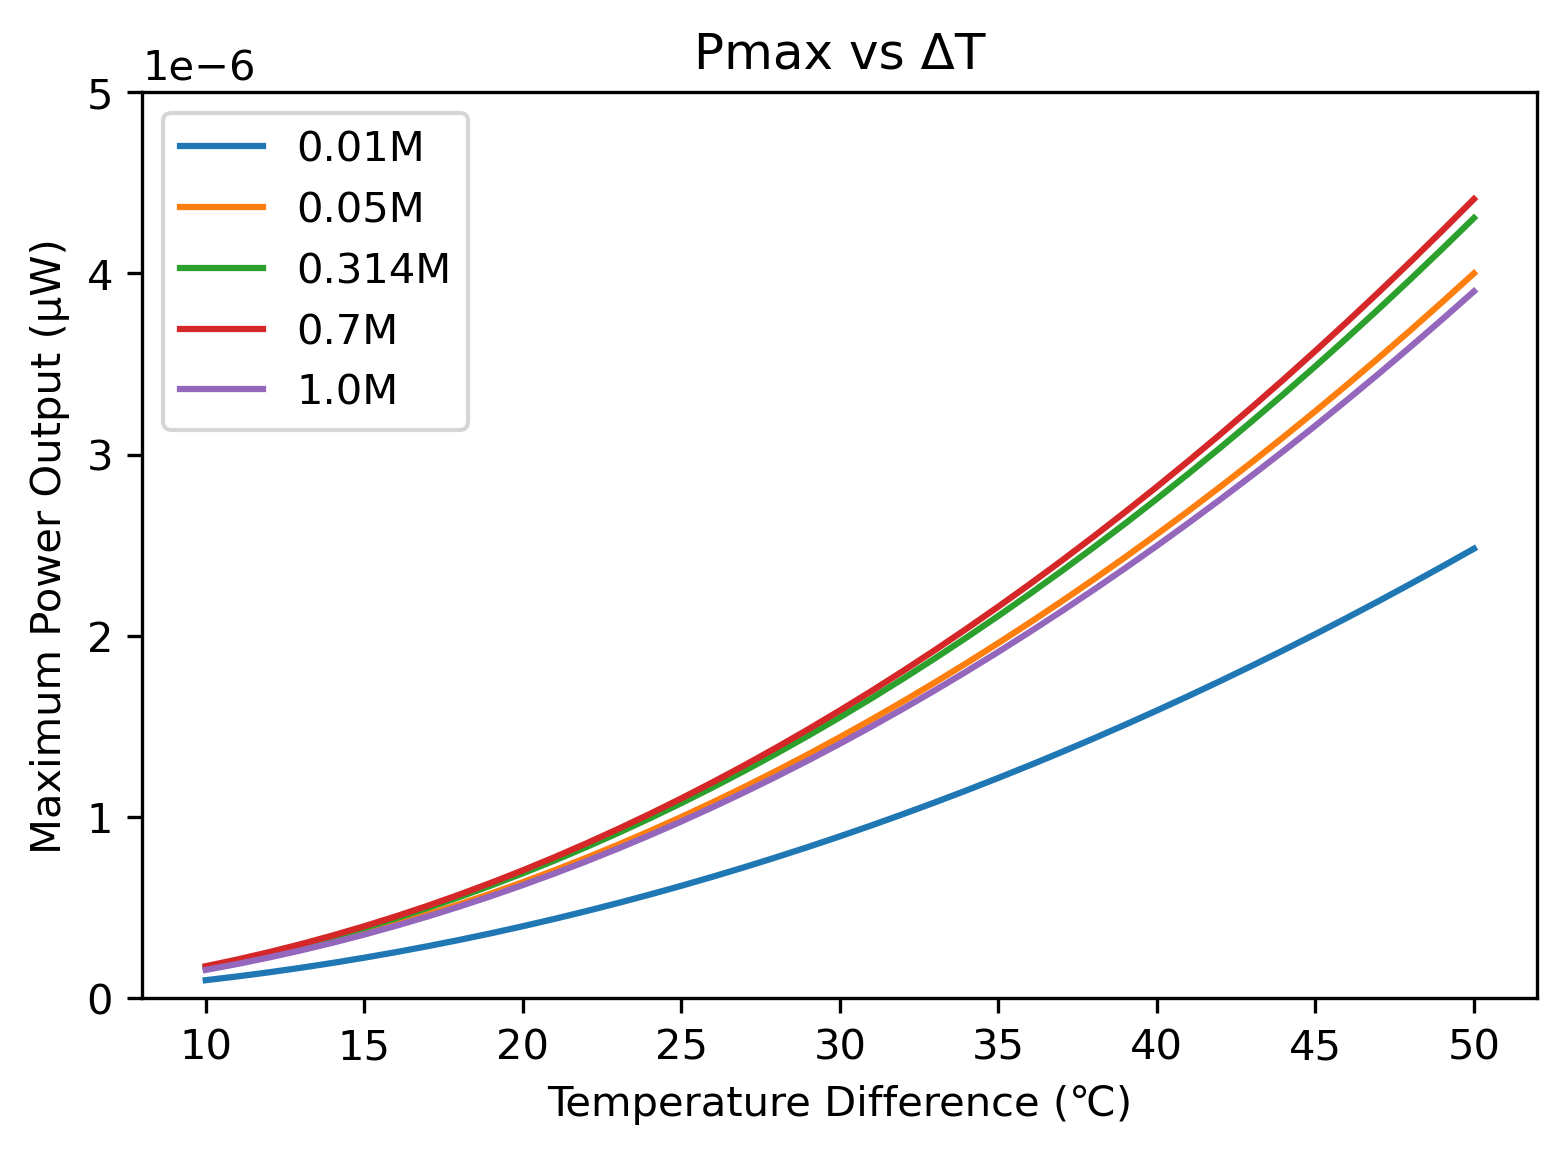

In [9]:
#Plotting Pmax vs delta T
df.plot.line(x="Temperature Difference (\u0394T)") #Set the x-axis as the temperature difference
plt.title("Pmax vs \u0394T")                       #Set the title of the plot
plt.ylabel("Maximum Power Output (\u03BCW)")       #Label the y-axis 
plt.xlabel("Temperature Difference (\u2103)")      #Label the x-axis 
plt.ylim(0,5e-6)                                   #Set the limits on the y-axis to 5e-6 starting from 0
plt.show()                                         #Display the plot

# # Rint VS Type of TPMS

In [6]:
#Initializing a list for storing the different values of Rint 
R_list = []

#### NOTE: The following values of Maximum Power Density/(delta T)^2 were taken from Figure 23. Effect of Triply Periodic Minimal Surface Structures on Mechanical and Power Conversion Performance of Thermogalvanic brick by Benjamin Obeng
        #using  a tool called GetData Graph Digitizer 2.26.0.20 
        ## Dimensions of 3D printed TPMS structure taken into consideration =  199mm x 88.8mm x 52.3mm
        ## So, area of active electrode =  88.8mm x 52.3mm = 4644.24 mm^2 = 4.64424 x 10^-3 m^2 => This value was used while calculating Rint as seen below:

#Gyoroid
Pmax_density = float(2.56e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#IWP
Pmax_density = float(1.50e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Lidinoid
Pmax_density = float(3.14e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Neovius
Pmax_density = float(1.81e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Octo
Pmax_density = float(2.06e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Schwarz D
Pmax_density = float(2.86e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Schwarz P
Pmax_density = float(2.17e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Split P
Pmax_density = float(4.76e-6)
Ri = float(((0.00084)**2)/(4*Pmax_density*4.64424e-3))
R_list.append(Ri)

#Display the calculated values in the list
print(R_list)

[14.83692703219472, 25.32168880161232, 12.09634815363646, 20.98482497371187, 18.43812291379538, 13.280606014831637, 17.503471521851836, 7.9795237820206895]


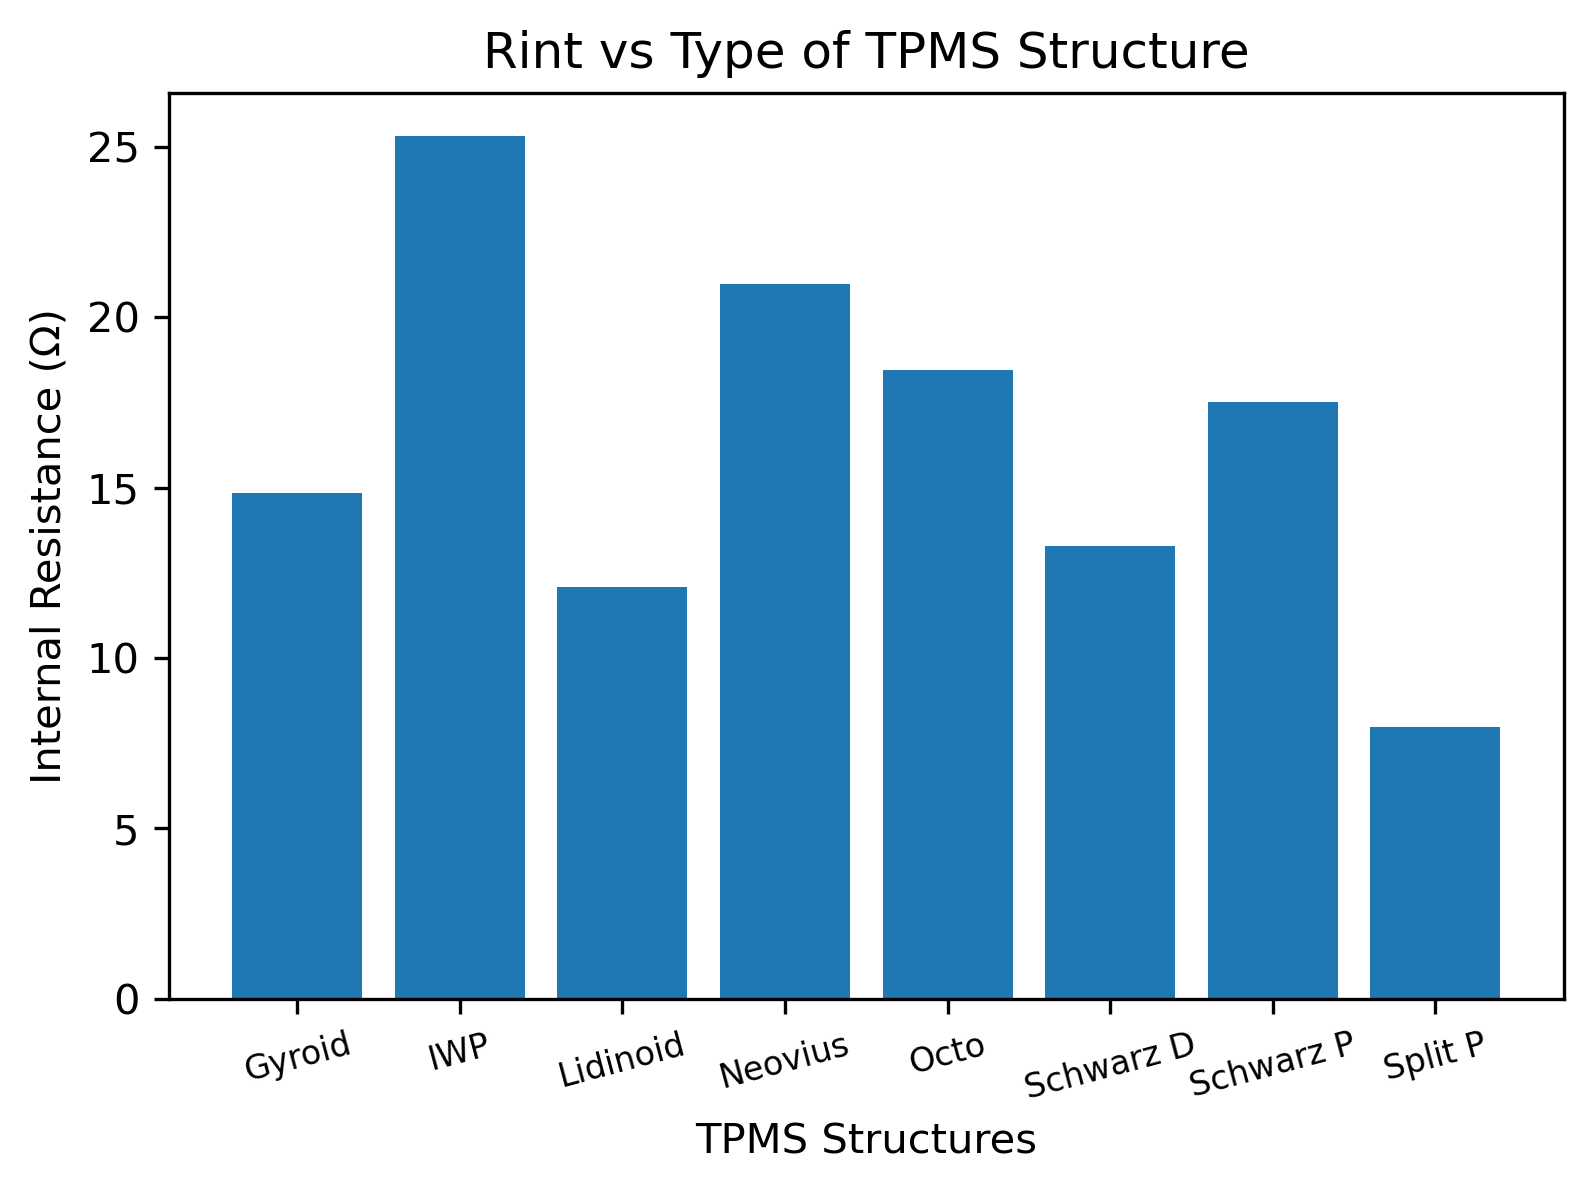

In [8]:
#Plotting Rint VS TPMS used
x = ['Gyroid', 'IWP', 'Lidinoid', 'Neovius', 'Octo', 'Schwarz D', 'Schwarz P', 'Split P'] #Set the names of the ticks on the x-axis
plt.bar(x, R_list)                                                                        #Plot a bar graph with list x at the x-axis and R_list as the y-axis
plt.xlabel('TPMS Structures')                                                             #Label the x-axis
plt.ylabel('Internal Resistance (\u03A9)')                                                #Label the y-axis
plt.title('Rint vs Type of TPMS Structure')                                               #Give a title to the plot
plt.tick_params(axis='x', labelsize=8)                                                    #Reduce the size of labels on x-axis to avoid overlapping and enhance visibility
plt.xticks(rotation=15)                                                                   #Rotate the label on the x-axis by 15 degrees anti-clockwise
plt.show()                                                                                #Display the plot

# END